# Proyek Analisis Data: Nama dataset
- Nama: Reza Syahputra
- Email: eca.lucky7@gmail.com
- Id Dicoding: rezaputra

## Menentukan Pertanyaan Bisnis

- pertanyaan 1 : Session apa yang menjadi favorite untuk menyewa sepeda bagi pengguna terdaftar ?
- pertanyaan 2 : Bagaimana trend secara Bulanan penyewaan sepeda secara total bagi pengguna terdaftar maupun casual?

## Menyaipkan semua library yang dibuthkan

In [ ]:
!unzip /content/Bike-sharing-dataset.zip

Archive:  /content/Bike-sharing-dataset.zip
  inflating: Readme.txt              
  inflating: day.csv                 
  inflating: hour.csv                


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


## Data Wrangling

### Gathering Data

In [4]:
day_data = pd.read_csv('day.csv')
day_data.head(5)

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [ ]:
day_data.tail()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
726,727,2012-12-27,1,1,12,0,4,1,2,0.254167,0.226642,0.652917,0.350133,247,1867,2114
727,728,2012-12-28,1,1,12,0,5,1,2,0.253333,0.255046,0.590000,0.155471,644,2451,3095
728,729,2012-12-29,1,1,12,0,6,0,2,0.253333,0.242400,0.752917,0.124383,159,1182,1341
729,730,2012-12-30,1,1,12,0,0,0,1,0.255833,0.231700,0.483333,0.350754,364,1432,1796
730,731,2012-12-31,1,1,12,0,1,1,2,0.215833,0.223487,0.577500,0.154846,439,2290,2729


### Assessing Data

In [ ]:
day_data.describe(include='all')

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
unique,NaN,731,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,2011-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,366.000000,NaN,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,NaN,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,NaN,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,NaN,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,NaN,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,NaN,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000


In [ ]:
day_data.isnull().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [7]:
day_data.dtypes

instant         int64
dteday         object
season          int64
yr              int64
mnth            int64
holiday         int64
weekday         int64
workingday      int64
weathersit      int64
temp          float64
atemp         float64
hum           float64
windspeed     float64
casual          int64
registered      int64
cnt             int64
dtype: object

Tidak terdapat kolom dengan kondisi null

In [ ]:
day_data.duplicated().sum()

0

Pada saat pengecekkan data duplicated pun tidak ditemukan data duplicated

In [ ]:
q25, q75 = np.percentile(day_data['registered'], 25), np.percentile(day_data['registered'], 75)
print('Quartile 1 :', q25, '', 'Quartile 3 :', q75)

iqr = q75 - q25
cut_off = iqr * 1.5
minimum, maximum = q25 - cut_off, q75 + cut_off

outliers = [x for x in day_data['registered'] if x < minimum or x > maximum]
print(outliers)

Quartile 1 : 2497.0  Quartile 3 : 4776.5
[]


Pada pengecekkan untuk data outliers pun tidak ditemukan data yang sangat rendah maupun sangat tinggi (outliers) Untuk kolom jumlah sepeda yang di sewa oleh registered user

In [ ]:
q25, q75 = np.percentile(day_data['casual'], 25), np.percentile(day_data['casual'], 75)
print('Quartile 1 :', q25, '', 'Quartile 3 :', q75)

iqr = q75 - q25
cut_off = iqr * 1.5
minimum, maximum = q25 - cut_off, q75 + cut_off

outliers = [x for x in day_data['casual'] if x < minimum or x > maximum]
print(len(outliers))

Quartile 1 : 315.5  Quartile 3 : 1096.0
44


Data outliers ditemukan pada kolom 'Casual', sebanyak 44 baris

### Cleaning Data

Dikarenakan tidak ada data hilang, duplicated maupun outliers yang masih tergolong sedikit, maka tidak diperlukan Cleaning Data

Namun untuk kebutuhan visualisasi untuk beberapa kolom dengan value berupa number diubah menjadi String agar ketika di visualisasikan tidak menghasilkan label continue

In [ ]:
day_data['season'] = day_data['season'].astype('string')
day_data['mnth'] = day_data['mnth'].astype('string')

## Exploratory Data Analysis (EDA)

### Explore ...

array([[<Axes: title={'center': 'instant'}>,
        <Axes: title={'center': 'season'}>,
        <Axes: title={'center': 'yr'}>, <Axes: title={'center': 'mnth'}>],
       [<Axes: title={'center': 'holiday'}>,
        <Axes: title={'center': 'weekday'}>,
        <Axes: title={'center': 'workingday'}>,
        <Axes: title={'center': 'weathersit'}>],
       [<Axes: title={'center': 'temp'}>,
        <Axes: title={'center': 'atemp'}>,
        <Axes: title={'center': 'hum'}>,
        <Axes: title={'center': 'windspeed'}>],
       [<Axes: title={'center': 'casual'}>,
        <Axes: title={'center': 'registered'}>,
        <Axes: title={'center': 'cnt'}>, <Axes: >]], dtype=object)

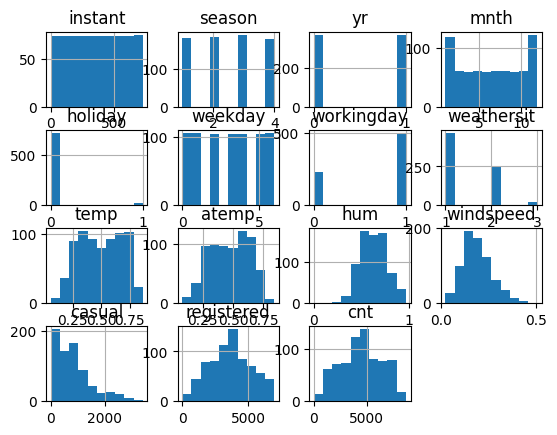

In [ ]:
day_data.hist()

Dari histogram yang dihasilkan, menunjukkan bahwa data yang akan digunakan cukup bagus, ditunjukkan dari histogram yang terdistribusi normal

In [ ]:
day_data[['season', 'registered']].groupby(by='season').sum()

,registered
season,
1,410726
2,715067
3,835038
4,711831


Melakukan quick analysis untunk mengetahui jumlah sewa sepeda di kelompokkan berdasarkan musim

In [ ]:
trend_month = day_data[['mnth', 'registered']].groupby(by='mnth', as_index=False).sum()
trend_month['mnth'] = trend_month['mnth'].astype('int')
trend_month.sort_values(by='mnth', inplace = True)
trend_month

,mnth,registered
0,1,122891
4,2,136389
5,3,184476
6,4,208292
7,5,256401
8,6,272436
9,7,266791
10,8,279155
11,9,275668
1,10,262592


In [ ]:
day_data.groupby(by='mnth').agg({
    'casual': ['sum','max', 'min'],
    'registered': ['sum','max', 'min'],
})

casual            registered            
        sum   max  min        sum   max   min
mnth                                         
1     12042  1070    9     122891  4185   416
2     14963  1435   47     136389  4546   905
3     44444  3155   46     184476  5893   491
4     60802  3252  120     208292  5950   674
5     75285  3410  255     256401  6433  2213
6     73906  2963  477     272436  6456  2993
7     78157  3065  562     266791  6790  2298
8     72039  2827  226     279155  6541   889
9     70323  3160  118     275668  6946  1689
10    59760  3031    2     262592  6911    20
11    36603  2290   69     218228  5520   935
12    21693  1153    9     189343  6055   432

Eksplorasi ditujukan untuk mengetahui sebaran sewa sepeda berdasarkan bulan

## Visualization & Explanatory Analysis

### Pertanyaan 1:

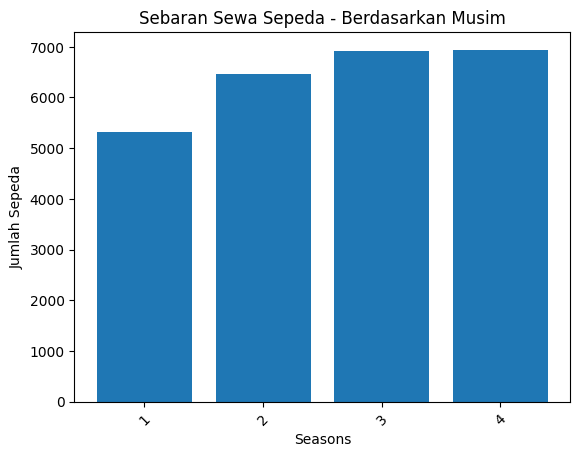

In [ ]:
plt.bar(x=day_data['season'], height=day_data['registered'])
plt.xlabel("Seasons")
plt.ylabel("Jumlah Sepeda")
plt.title('Sebaran Sewa Sepeda - Berdasarkan Musim')
plt.xticks(rotation=45)
plt.show()

### Pertanyaan 2:

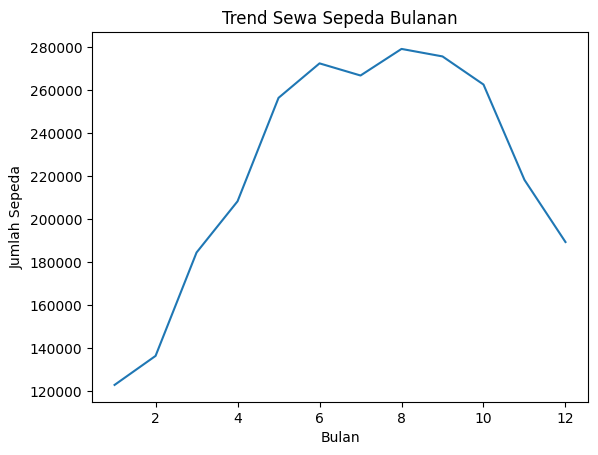

In [ ]:
plt.plot(trend_month['mnth'], trend_month['registered'])
plt.xlabel("Bulan")
plt.ylabel("Jumlah Sepeda")
plt.title("Trend Sewa Sepeda Bulanan")
plt.show()

## Conclusion

- Conclution pertanyaan 1

Dari bar chart yang dihasilkan menunjukkan bahwa Musim 3 dan 4 menjadi musim dengan penyewa terbanyak. Trend juga mengalami kenaikan mulai dari musim 1 hingga musim ke 4  
- conclution pertanyaan 2

Dari trend line chart yang dihasilkan, dapat disimpulkan bahwa trend penyewaan sepeda mengalami peningkatan dari awal bulan hingga bulan ke 8. Meskipun terdapat penurunan sedikit dibulan 7 namun menjelang akhir tahun penyewaan sepeda mengalami penurunan

## Analis Lanjutan

Mencari tahu bagaimana kombinasi antara hari kerja dengan kondisi cuaca (weathersit)

In [ ]:
musim_weekday = day_data[['weekday', 'weathersit', 'cnt']].groupby(by=['weekday', 'weathersit'], as_index=False).sum()
musim_weekday['weekday'] = musim_weekday['weekday'].astype('int')
musim_weekday['weathersit'] = musim_weekday['weathersit'].astype('int')
musim_weekday.sort_values(by='cnt', inplace = True, ascending=False)
musim_weekday

,weekday,weathersit,cnt
9,3,1,341397
12,4,1,336000
17,6,1,333384
0,0,1,321787
15,5,1,319957
6,2,1,309374
3,1,1,296053
16,5,2,167833
4,1,2,156663
7,2,2,148185


Dapat disimpulkan bahwa vendor penyewa sepeda disrankan untuk menyiapkan sepeda untuk di sewa lebih banyak pada weekend (asumsi 0 -> Minggu, 6-> Sabtu) pada cuaca yang terang (1)